In [36]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [44]:
pumpkins.isnull().sum()

new_columns = ['Variety','Package', 'Month', 'Low Price', 'High Price', 'Date', 'City Name']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
print(pumpkins)

      City Name               Package    Variety     Date  Low Price  \
70    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  9/24/16      15.00   
71    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  9/24/16      18.00   
72    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  10/1/16      18.00   
73    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  10/1/16      17.00   
74    BALTIMORE  1 1/9 bushel cartons   PIE TYPE  10/8/16      15.00   
...         ...                   ...        ...      ...        ...   
1738  ST. LOUIS    1/2 bushel cartons  MINIATURE  9/30/16      15.00   
1739  ST. LOUIS    1/2 bushel cartons  MINIATURE  9/30/16      13.75   
1740  ST. LOUIS    1/2 bushel cartons  MINIATURE  9/30/16      10.75   
1741  ST. LOUIS    1/2 bushel cartons  MINIATURE  9/30/16      12.00   
1742  ST. LOUIS    1/2 bushel cartons  MINIATURE  9/30/16      12.00   

      High Price  
70          15.0  
71          18.0  
72          18.0  
73          17.0  
74          15.0  
...          ...  
17

In [39]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2 #total price dibagi 2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})
#kolom package aneh, kudu diubah dengan cara memisahkan tiap string dengan spasi buat dapetin porsi per nya itu
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
print(new_pumpkins)

      Month    Variety       City               Package  Low Price  \
70        9   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      15.00   
71        9   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      18.00   
72       10   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      18.00   
73       10   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      17.00   
74       10   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      15.00   
...     ...        ...        ...                   ...        ...   
1738      9  MINIATURE  ST. LOUIS    1/2 bushel cartons      15.00   
1739      9  MINIATURE  ST. LOUIS    1/2 bushel cartons      13.75   
1740      9  MINIATURE  ST. LOUIS    1/2 bushel cartons      10.75   
1741      9  MINIATURE  ST. LOUIS    1/2 bushel cartons      12.00   
1742      9  MINIATURE  ST. LOUIS    1/2 bushel cartons      12.00   

      High Price  Price  
70          15.0  13.50  
71          18.0  16.20  
72          18.0  16.20  
73          17.0  15.30  
74          15.0  13.50  
...

In [52]:
from sklearn.preprocessing import LabelEncoder

new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)

new_columns = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

poly_pumpkins

,Month,Variety,City,Package,Price
70,1,3,1,0,13.50
71,1,3,1,0,16.20
72,2,3,1,0,16.20
73,2,3,1,0,15.30
74,2,3,1,0,13.50
...,...,...,...,...,...
1738,1,1,9,2,30.00
1739,1,1,9,2,28.75
1740,1,1,9,2,25.75
1741,1,1,9,2,24.00


In [53]:
#kita cek korelasinya

corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Variety,City,Package,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.149129
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.864428
City,-0.188728,-0.248441,1.000000,0.301604,0.323825
Package,-0.144847,-0.614855,0.301604,1.000000,0.608848
Price,-0.149129,-0.864428,0.323825,0.608848,1.000000


In [57]:
#buat pipeline
X = poly_pumpkins.iloc[:, 3:4].values
y = poly_pumpkins.iloc[:, 4:5].values

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipeline.fit(np.array(X_train), y_train)
y_pred = pipeline.predict(X_test)


[[47.41666667]
 [15.67073864]
 [23.41935484]
 [23.41935484]
 [14.7       ]
 [14.7       ]
 [15.67073864]
 [15.67073864]
 [15.67073864]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [15.67073864]
 [15.67073864]
 [15.67073864]
 [15.67073864]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [47.41666667]
 [15.67073864]
 [15.67073864]
 [15.67073864]
 [34.2974359 ]
 [34.2974359 ]
 [15.67073864]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [15.67073864]
 [23.41935484]
 [34.2974359 ]
 [34.2974359 ]
 [15.67073864]
 [14.7       ]
 [34.2974359 ]
 [47.41666667]
 [15.67073864]
 [23.41935484]
 [47.41666667]
 [34.2974359 ]
 [15.67073864]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [15.67073864]
 [34.2974359 ]
 [15.67073864]
 [15.67073864]
 [34.2974359 ]
 [15.67073864]
 [23.41935484]
 [34.2974359 ]
 [15.67073864]
 [34.2974359 ]
 [23.41935484]
 [34.2974359 ]
 [14.7       ]
 [34.2974359 ]
 [15.67073864]
 [15.67073864]
 [34.2974359 ]
 [34.29743

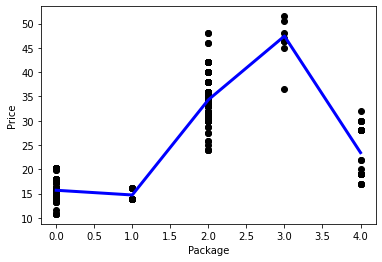

In [59]:
df = pd.DataFrame({
    'x': X_test[:,0],
    'y': y_pred[:, 0]
})
df.sort_values(by='x', inplace=True)
points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1], color="blue", linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.scatter(X,y, color='black')
plt.show()

In [60]:
accuracy_score = pipeline.score(X_test, y_test)
print('Model Accuracy : ', accuracy_score)

Model Accuracy :  0.8762464654078154


In [61]:
pipeline.predict(np.array([[2.75]]))

array([[46.35833879]])